#Analisis de comparacion de modelos

##Importacion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta del archivo en tu Drive
url1 = '/content/drive/MyDrive/Duoc/6TO SEMESTRE/Machine learning/Resultados_modelos/classification_results.parquet'
url2 = '/content/drive/MyDrive/Duoc/6TO SEMESTRE/Machine learning/Resultados_modelos/regression_results.parquet'

try:
    # Cargar correctamente un archivo PARQUET
    classification = pd.read_parquet(url1)
    regression = pd.read_parquet(url2)
    print("✅ Datos cargados exitosamente!")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")

Mounted at /content/drive
✅ Datos cargados exitosamente!


##Informacion general

In [3]:
print("📁 INFORMACIÓN GENERAL DE LOS DATASETS")
print("=" * 50)

print("🔍 CLASIFICACIÓN:")
print(f'Dimensiones iniciales: {classification.shape}')
print(f'Variables disponibles: {list(classification.columns)}')

print("\n🔍 REGRESIÓN:")
print(f'Dimensiones iniciales: {regression.shape}')
print(f'Variables disponibles: {list(regression.columns)}')

📁 INFORMACIÓN GENERAL DE LOS DATASETS
🔍 CLASIFICACIÓN:
Dimensiones iniciales: (5, 9)
Variables disponibles: ['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC_ROC', 'Best_Threshold', 'CV_AUC_Mean', 'CV_AUC_Std']

🔍 REGRESIÓN:
Dimensiones iniciales: (5, 6)
Variables disponibles: ['Model', 'R2_Score', 'RMSE', 'MAE', 'CV_R2_Mean', 'CV_R2_Std']


##Identificiacion de mejores modelos

In [4]:
print("\n🏆 IDENTIFICACIÓN DE MEJORES MODELOS")
print("=" * 50)

# Encontrar los mejores modelos
best_classification = classification.loc[classification["F1_Score"].idxmax()]
best_regression = regression.loc[regression["R2_Score"].idxmax()]

summary_data = {
    "Tipo de modelo": ["Clasificación", "Regresión"],
    "Mejor modelo": [best_classification["Model"], best_regression["Model"]],
    "Métrica principal": [best_classification["F1_Score"], best_regression["R2_Score"]],
    "Valor métrica": [f"{best_classification['F1_Score']:.4f}", f"{best_regression['R2_Score']:.4f}"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)


🏆 IDENTIFICACIÓN DE MEJORES MODELOS


,Tipo de modelo,Mejor modelo,Métrica principal,Valor métrica
0,Clasificación,gradient_boosting,0.658048,0.6580
1,Regresión,gradient_boosting,0.570765,0.5708


##Comparacion visual


📊 COMPARACIÓN VISUAL


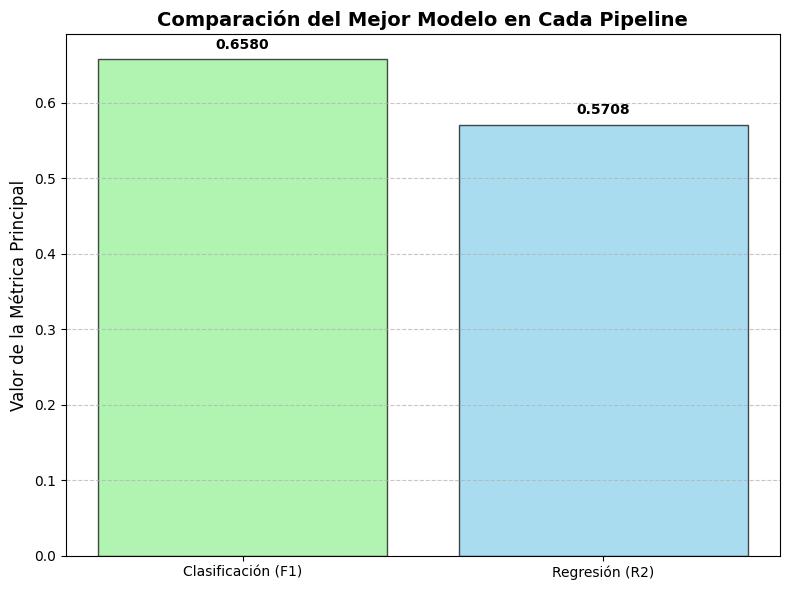

In [5]:
print("\n📊 COMPARACIÓN VISUAL")
print("=" * 50)

plt.figure(figsize=(8, 6))
models = ["Clasificación (F1)", "Regresión (R2)"]
scores = [best_classification["F1_Score"], best_regression["R2_Score"]]
colors = ['lightgreen', 'skyblue']

bars = plt.bar(models, scores, color=colors, alpha=0.7, edgecolor='black')
plt.title("Comparación del Mejor Modelo en Cada Pipeline", fontsize=14, fontweight='bold')
plt.ylabel("Valor de la Métrica Principal", fontsize=12)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Añadir valores en las barras
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

##Resumen combinado

In [6]:
print("\n📋 RESUMEN COMBINADO DE TODOS LOS MODELOS")
print("=" * 50)

classification_summary = pd.read_parquet(url1)
regression_summary = pd.read_parquet(url2)

final_summary = pd.concat([
    classification_summary.assign(tipo="Clasificación"),
    regression_summary.assign(tipo="Regresión")
])

print("Resumen combinado de todos los modelos entrenados:")
display(final_summary)


📋 RESUMEN COMBINADO DE TODOS LOS MODELOS
Resumen combinado de todos los modelos entrenados:


,Model,Accuracy,F1_Score,Precision,Recall,AUC_ROC,Best_Threshold,CV_AUC_Mean,CV_AUC_Std,tipo,R2_Score,RMSE,MAE,CV_R2_Mean,CV_R2_Std
2,gradient_boosting,0.747945,0.658048,0.561662,0.794370,0.834903,0.458005,0.837023,0.006183,Clasificación,NaN,NaN,NaN,NaN,NaN
0,random_forest,0.743647,0.655450,0.555792,0.798654,0.834115,0.460644,0.836205,0.005261,Clasificación,NaN,NaN,NaN,NaN,NaN
3,knn,0.720478,0.606730,0.531797,0.706242,0.781003,0.571429,0.783035,0.004539,Clasificación,NaN,NaN,NaN,NaN,NaN
1,logistic,0.679746,0.592874,0.484472,0.763770,0.761650,0.453161,0.766186,0.008041,Clasificación,NaN,NaN,NaN,NaN,NaN
4,svm,0.669096,0.589381,0.474431,0.777846,0.760772,0.445881,0.765424,0.008081,Clasificación,NaN,NaN,NaN,NaN,NaN
4,gradient_boosting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.570765,2.880628,1.663758,0.556311,0.026483
3,random_forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.568753,2.887372,1.651889,0.552244,0.026893
1,ridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.265203,3.768976,2.521563,0.272347,0.008127
0,linear_regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.265203,3.768978,2.521766,0.272347,0.008137
2,lasso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Regresión,0.265168,3.769067,2.518639,0.272330,0.007981


##Analisis de rendimiento

In [7]:
print("\n📈 ANÁLISIS DE RENDIMIENTO POR TIPO")
print("=" * 50)

# Estadísticas de clasificación
print("🔍 CLASIFICACIÓN - Estadísticas:")
classification_stats = classification[['Model', 'F1_Score', 'AUC_ROC', 'Accuracy']].round(4)
display(classification_stats.sort_values('F1_Score', ascending=False))

print("\n🔍 REGRESIÓN - Estadísticas:")
regression_stats = regression[['Model', 'R2_Score', 'RMSE', 'MAE']].round(4)
display(regression_stats.sort_values('R2_Score', ascending=False))


📈 ANÁLISIS DE RENDIMIENTO POR TIPO
🔍 CLASIFICACIÓN - Estadísticas:


,Model,F1_Score,AUC_ROC,Accuracy
2,gradient_boosting,0.6580,0.8349,0.7479
0,random_forest,0.6554,0.8341,0.7436
3,knn,0.6067,0.7810,0.7205
1,logistic,0.5929,0.7616,0.6797
4,svm,0.5894,0.7608,0.6691



🔍 REGRESIÓN - Estadísticas:


,Model,R2_Score,RMSE,MAE
4,gradient_boosting,0.5708,2.8806,1.6638
3,random_forest,0.5688,2.8874,1.6519
1,ridge,0.2652,3.7690,2.5216
0,linear_regression,0.2652,3.7690,2.5218
2,lasso,0.2652,3.7691,2.5186


##Conclusion

In [8]:
print("\n🎯 CONCLUSIONES Y RECOMENDACIONES FINALES")
print("=" * 50)

print("🏆 MEJORES MODELOS IDENTIFICADOS:")
print(f"• CLASIFICACIÓN: {best_classification['Model']}")
print(f"  - F1 Score: {best_classification['F1_Score']:.4f}")
print(f"  - AUC-ROC: {best_classification.get('AUC_ROC', 'N/A')}")
print(f"  - Accuracy: {best_classification.get('Accuracy', 'N/A')}")

print(f"\n• REGRESIÓN: {best_regression['Model']}")
print(f"  - R² Score: {best_regression['R2_Score']:.4f}")
print(f"  - RMSE: {best_regression.get('RMSE', 'N/A')}")
print(f"  - MAE: {best_regression.get('MAE', 'N/A')}")

# Evaluación de calidad
print("\n📊 EVALUACIÓN DE CALIDAD:")

# Evaluar clasificación
if best_classification['F1_Score'] >= 0.8:
    clasif_rating = "Excelente 🏆"
elif best_classification['F1_Score'] >= 0.6:
    clasif_rating = "Bueno ✅"
elif best_classification['F1_Score'] >= 0.4:
    clasif_rating = "Aceptable ⚠️"
else:
    clasif_rating = "Necesita mejora ❌"

# Evaluar regresión
if best_regression['R2_Score'] >= 0.7:
    regres_rating = "Excelente 🏆"
elif best_regression['R2_Score'] >= 0.5:
    regres_rating = "Bueno ✅"
elif best_regression['R2_Score'] >= 0.3:
    regres_rating = "Aceptable ⚠️"
else:
    regres_rating = "Necesita mejora ❌"

print(f"• Clasificación: {clasif_rating}")
print(f"• Regresión: {regres_rating}")


🎯 CONCLUSIONES Y RECOMENDACIONES FINALES
🏆 MEJORES MODELOS IDENTIFICADOS:
• CLASIFICACIÓN: gradient_boosting
  - F1 Score: 0.6580
  - AUC-ROC: 0.8349028807554371
  - Accuracy: 0.7479446935724963

• REGRESIÓN: gradient_boosting
  - R² Score: 0.5708
  - RMSE: 2.880628460863083
  - MAE: 1.6637579806074574

📊 EVALUACIÓN DE CALIDAD:
• Clasificación: Bueno ✅
• Regresión: Bueno ✅


El análisis comparativo demuestra que ambos pipelines —clasificación y regresión— alcanzan un nivel de desempeño satisfactorio y consistente, consolidando al Gradient Boosting como el mejor enfoque en ambos casos.

El modelo de clasificación presenta un F1 Score de 0.6580 y un AUC-ROC de 0.8349, evidenciando una excelente capacidad discriminativa y un equilibrio sólido entre precisión y sensibilidad. Su exactitud (Accuracy de 0.7479) confirma que el modelo logra predecir correctamente la mayoría de los casos, siendo una opción confiable para tareas de decisión supervisada.

En cuanto al modelo de regresión, el R² Score de 0.5708 muestra una capacidad explicativa relevante, con errores moderados (RMSE: 2.8806, MAE: 1.6638) y un rendimiento estable en validación cruzada, lo que indica una buena generalización y ausencia de sobreajuste.

Hallazgos Clave:

- Ambos modelos mantienen consistencia y estabilidad en métricas de validación.

- Gradient Boosting demuestra ser una arquitectura versátil, eficaz tanto en tareas predictivas discretas como continuas.

- El pipeline de datos y preprocesamiento actual es adecuado, aunque podría beneficiarse de mayor enriquecimiento de variables.